# Transformações e Histograma

## Histograma
Esse projeto aborda o uso de técnicas para analisar e manipular histogramas, com o objetivo de melhorar o contraste das imagens e torná-las mais informativas. É utilizado Numpy e OpenCV.

## Descrição
O histograma de uma imagem representa a distribuição dos níveis de intensidade de pixels. É uma ótima forma de manipular imagens, pois permite analisar o contraste, o brilho e a distribuição geral de intensidade. Para melhorar o contraste de uma imagem é utilizado  equalização do histograma, tornando detalhes mais visíveis, especialmente em imagens com uma má distribuição.

O objetivo é melhorar o contraste da imagem, ajustando a distribuição dos níveis de cinza.

## Código

- **Exibição do Histograma**
    O histograma mostra a frequência dos valores de intensidade dos pixels. É útil para visualizar o impacto da normalização e como ela altera a distribuição dos níveis de cinza.

    ```python
    def plotHistograma(img, opcao):
        img_array = np.array(img)
        if opcao == 1:
            normalized = normalizarHistograma(img)
        else :
            normalized = normalizarHistogramaOpenCV(img)

        hist = cv2.calcHist([img_array], [0], None, [256], [0, 256])
        hist_normalized = cv2.calcHist([np.array(normalized)], [0], None, [256], [0, 256])

        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

        ax[0, 0].imshow(img, cmap='gray', aspect='auto')
        ax[0, 0].set_title('Imagem Original')
        ax[0, 0].axis('off')

        ax[0, 1].imshow(normalized, cmap='gray', aspect='auto')
        if opcao == 1:
            ax[0, 1].set_title('Imagem com Histograma Normalizado usando Numpy')
        else:
            ax[0, 1].set_title('Imagem com Histograma Normalizado usando OpenCV')

        ax[0, 1].set_title('Imagem com Histograma Normalizado')
        ax[0, 1].axis('off')

        ax[1, 0].plot(hist, color='gray')
        ax[1, 0].set_title('Histograma Original')
        ax[1, 0].set_xlim([0, 256])
        ax[1, 0].set_ylim([0, max(hist) * 1.1])

        ax[1, 1].plot(hist_normalized, color='gray')
        ax[1, 1].set_title('Histograma Normalizado')
        ax[1, 1].set_xlim([0, 256])
        ax[1, 1].set_ylim([0, max(hist_normalized) * 1.1])

        fig.tight_layout()

        
        plt.show()
    ```

- **Normalização de Histograma Numpy**

    A normalização do histograma redistribui os níveis de intensidade para que a imagem tenha um contraste melhor. Calculamos o histograma da imagem, determinamos a função de distribuição cumulativa (CDF) e usamos essa função para remapear os valores de intensidade.

    Fórmula:

    ```math
    \text{CDF normalizada} = \frac{\text{CDF} - \text{CDF mínima}}{\text{CDF máxima} - \text{CDF mínima}} \times 255
    ```          


    O histograma é calculado, e a função de distribuição cumulativa (CDF) é normalizada para redistribuir os valores de intensidade da imagem.

    ```python
    def normalizarHistograma(imagem):
        img = np.array(imagem)
        hist, bins = np.histogram(img.flatten(), 256, [0, 256])
        cdf = hist.cumsum()
        cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
        cdf_normalized = cdf_normalized.astype('uint8')
        img_normalized = cdf_normalized[img]
        return Image.fromarray(img_normalized)
    ```
- **Normalização de Histograma OpenCV**

    Calcular o histograma e aplicar a normalização com o OpenCV é feito através da função cv2.calcHist para calcular o histograma e redistribuir os níveis de intensidade.

    ```python
    def normalizarHistogramaOpenCV(imagem):
        img = np.array(imagem)
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        hist = hist / (img.shape[0] * img.shape[1])
        cdf = hist.cumsum()
        cdf_normalized = cdf * 255
        cdf_normalized = cdf_normalized.astype('uint8')
        img_normalized = cdf_normalized[img]
        return Image.fromarray(img_normalized)
    ```

### Codigo final

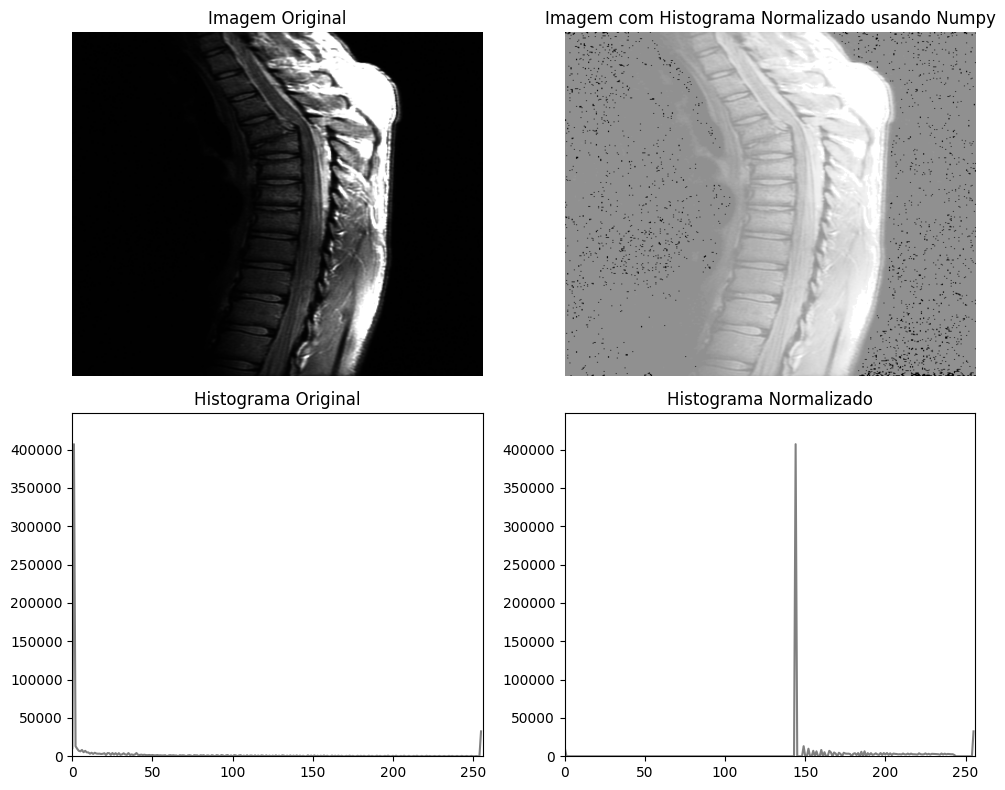

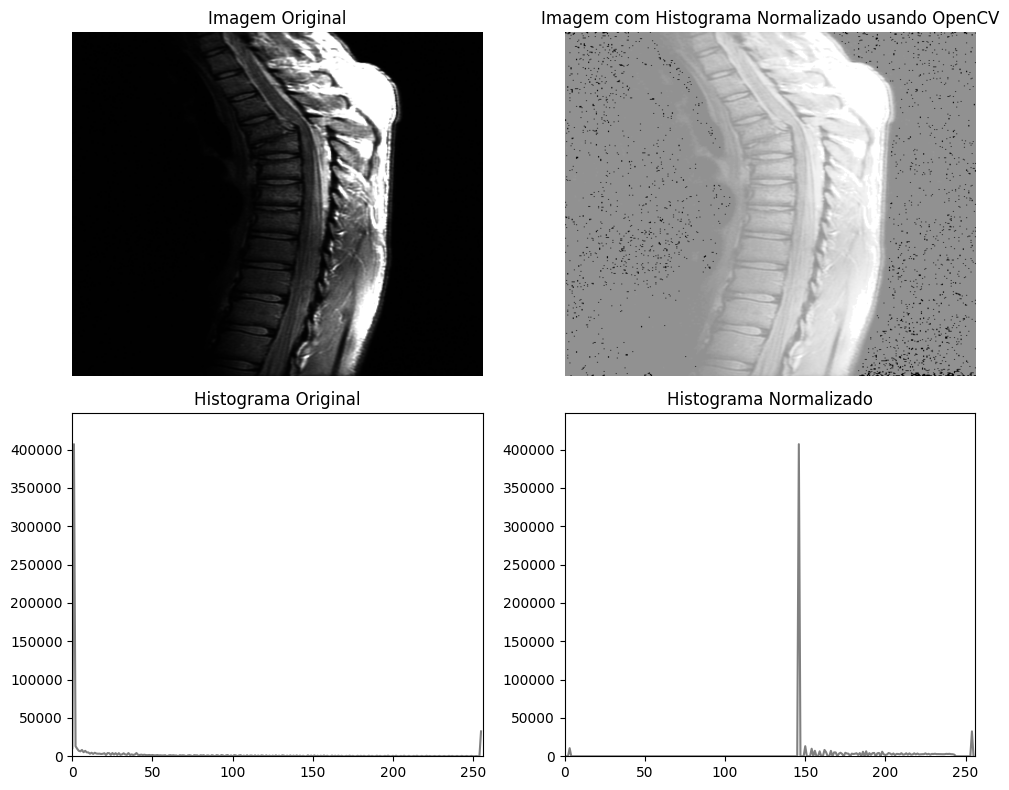

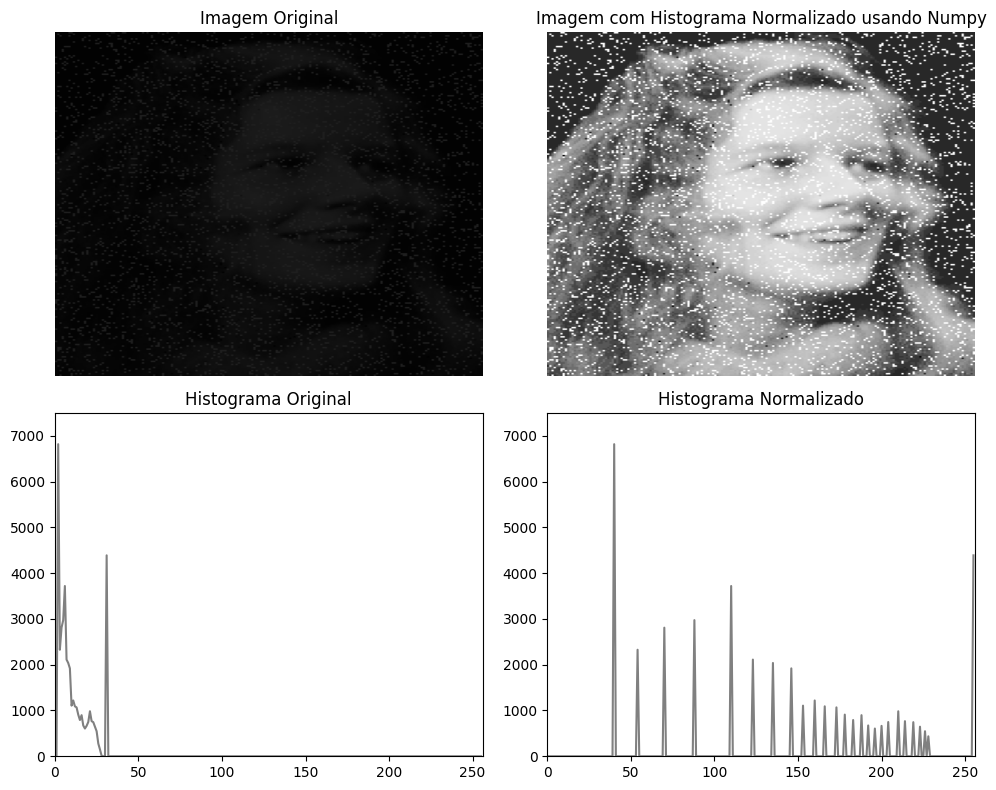

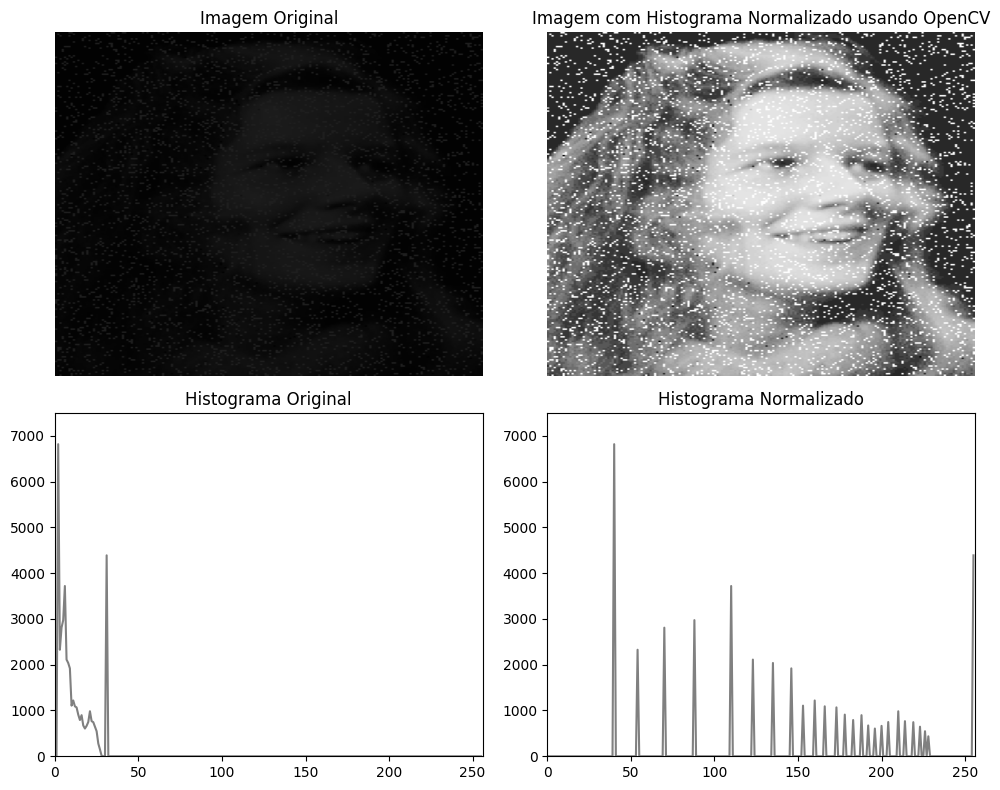

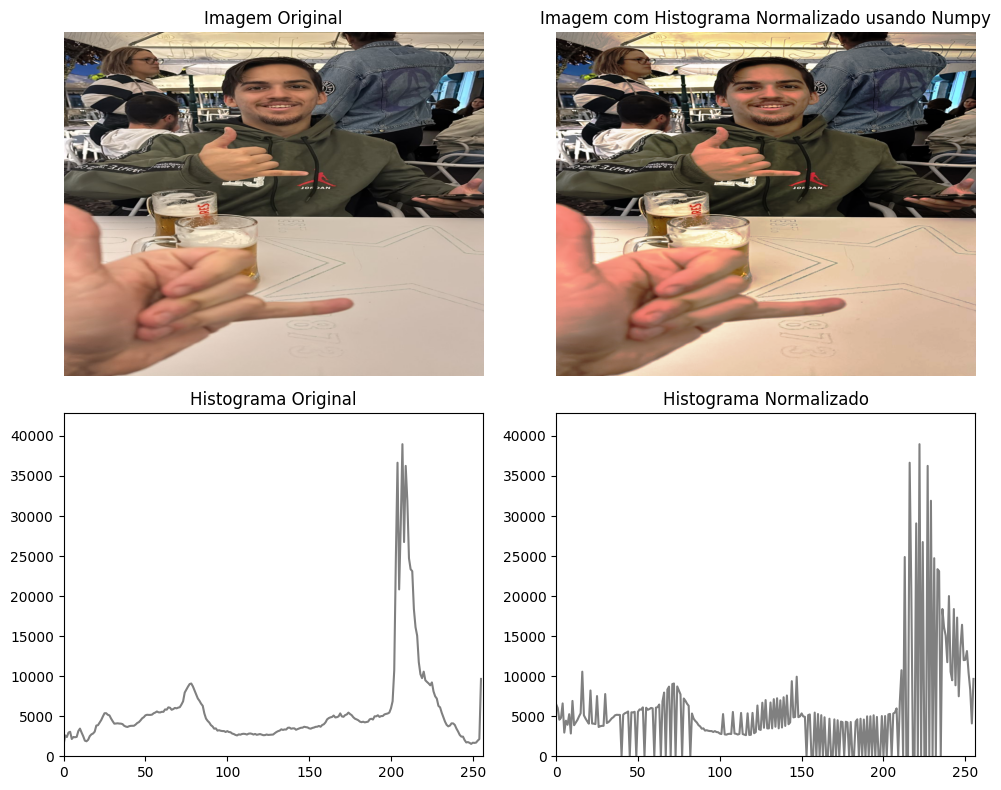

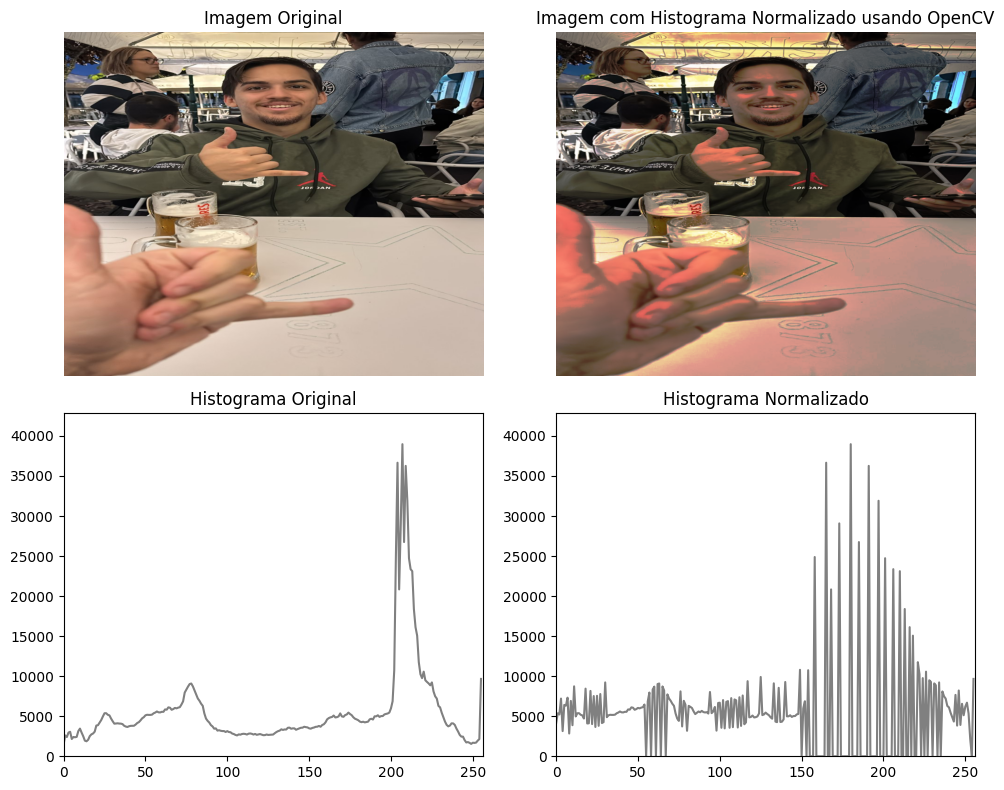

In [4]:
import datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def plotHistograma(img, opcao):
    img_array = np.array(img)
    if opcao == 1:
        normalized = normalizarHistograma(img)
    else :
        normalized = normalizarHistogramaOpenCV(img)

    hist = cv2.calcHist([img_array], [0], None, [256], [0, 256])
    hist_normalized = cv2.calcHist([np.array(normalized)], [0], None, [256], [0, 256])

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    ax[0, 0].imshow(img, cmap='gray', aspect='auto')
    ax[0, 0].set_title('Imagem Original')
    ax[0, 0].axis('off')

    ax[0, 1].imshow(normalized, cmap='gray', aspect='auto')
    if opcao == 1:
        ax[0, 1].set_title('Imagem com Histograma Normalizado usando Numpy')
    else:
        ax[0, 1].set_title('Imagem com Histograma Normalizado usando OpenCV')
        
    ax[0, 1].axis('off')

    ax[1, 0].plot(hist, color='gray')
    ax[1, 0].set_title('Histograma Original')
    ax[1, 0].set_xlim([0, 256])
    ax[1, 0].set_ylim([0, max(hist) * 1.1])

    ax[1, 1].plot(hist_normalized, color='gray')
    ax[1, 1].set_title('Histograma Normalizado')
    ax[1, 1].set_xlim([0, 256])
    ax[1, 1].set_ylim([0, max(hist_normalized) * 1.1])

    fig.tight_layout()

    
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def normalizarHistogramaOpenCV(imagem):
    img = np.array(imagem)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist / (img.shape[0] * img.shape[1])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255
    cdf_normalized = cdf_normalized.astype('uint8')
    img_normalized = cdf_normalized[img]
    return Image.fromarray(img_normalized)

def normalizarHistograma(imagem):
    img = np.array(imagem)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    img_normalized = cdf_normalized[img]
    return Image.fromarray(img_normalized)

def main():
    fig38 = Image.open('imgs/Fig0308(a)(fractured_spine).tif')
    enhanceMe = Image.open('imgs/enhance-me.gif')
    jadir = Image.open('imgs/jadirs.jpg')
    enhanceMe = enhanceMe.convert('RGB')

    plotHistograma(fig38, 1)
    plotHistograma(fig38, 2)

    plotHistograma(enhanceMe, 1)
    plotHistograma(enhanceMe, 2)

    plotHistograma(jadir, 1)
    plotHistograma(jadir, 2)

if __name__ == "__main__":
    main()
